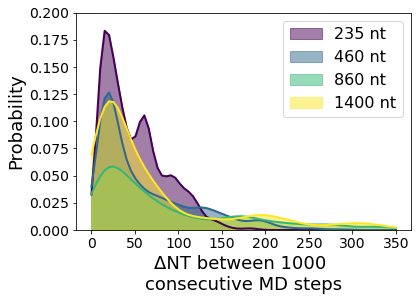

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

jump1 = []
with open('all_int_trans_200.txt', 'r') as inp1:
    for line in inp1:
        arr = line.split()
        a = float(arr[1])
        if a >= 10.0:
            jump1.append(a)
            
jump2 = []
with open('all_int_trans_460.txt', 'r') as inp2:
    for line2 in inp2:
        arr2 = line2.split()
        a2 = float(arr2[1])
        if a2 >= 10.0:
            jump2.append(a2)
            
jump3 = []
with open('all_int_trans_860.txt', 'r') as inp3:
    for line3 in inp3:
        arr3 = line3.split()
        a3 = float(arr3[1])
        if a3 >= 10.0:
            jump3.append(a3)
            
jump4 = []
with open('all_int_trans_1400.txt', 'r') as inp4:
    for line4 in inp4:
        arr4 = line4.split()
        a4 = float(arr4[1])
        if a4 >= 10.0:
            jump4.append(a4)
            

bins = np.linspace(0, 350, 70)

counts1, _, _ = plt.hist(jump1, bins=bins, range=(0, 350))
plt.clf()
counts2, _, _ = plt.hist(jump2, bins=bins, range=(0, 350))
plt.clf()
counts3, _, _ = plt.hist(jump3, bins=bins, range=(0, 350))
plt.clf()
counts4, _, _ = plt.hist(jump4, bins=bins, range=(0, 350))
plt.clf()


kde1 = gaussian_kde(jump1, bw_method='silverman')
pdf1 = kde1(bins)

kde2 = gaussian_kde(jump2, bw_method='silverman')
pdf2 = kde2(bins)

kde3 = gaussian_kde(jump3, bw_method='silverman')
pdf3 = kde3(bins)

kde4 = gaussian_kde(jump4, bw_method='silverman')
pdf4 = kde4(bins)



constant1 = 7.0

normalized_counts1 = counts1 / constant1
pdf_norm1 = pdf1 / constant1

constant2 = 10.0

normalized_counts2 = counts2 / constant2
pdf_norm2 = pdf2 / constant2

normalized_counts3 = counts3 / constant2
pdf_norm3 = pdf3 / constant2

constant3 = 6.0

normalized_counts4 = counts4 / constant3
pdf_norm4 = pdf4 / constant3



num_colors = 4
colors = plt.cm.viridis(np.linspace(0, 1, num_colors))
plt.clf()

plt.plot(bins, pdf_norm1 * max(normalized_counts1), color=colors[0], linewidth=2)
plt.fill_between(bins, pdf_norm1 * max(normalized_counts1), 0, alpha=0.5, color=colors[0], label='235 nt')

plt.plot(bins, pdf_norm2 * max(normalized_counts2), color=colors[1], linewidth=2)
plt.fill_between(bins, pdf_norm2 * max(normalized_counts2), 0, alpha=0.5, color=colors[1], label='460 nt')

plt.plot(bins, pdf_norm3 * max(normalized_counts3), color=colors[2], linewidth=2)
plt.fill_between(bins, pdf_norm3 * max(normalized_counts3), 0, alpha=0.5, color=colors[2], label='860 nt')

plt.plot(bins, pdf_norm4 * max(normalized_counts4), color=colors[3], linewidth=2)
plt.fill_between(bins, pdf_norm4 * max(normalized_counts4), 0, alpha=0.5, color=colors[3], label='1400 nt')


plt.ylim(0,0.2)
plt.legend()
plt.ylabel('Probability', fontsize=18)
plt.xlabel('ΔNT between 1000 \nconsecutive MD steps', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=16)
#plt.title('Low Salt', fontsize=20, weight='bold')
plt.savefig('int_trans.png', dpi=300, bbox_inches='tight')